In [ ]:
#Cost Optimization & ROI Analysis – Zepto Logistics


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('zepto_logistics_dataset.csv')



In [3]:
# check cost-related columns are numeric
df['Total_Cost'] = df['Fuel_Cost'] + df['Partner_Payout']
df['Revenue'] = df['discountedSellingPrice'] * df['quantity']
df['ROI'] = df['Revenue'] - df['Total_Cost']


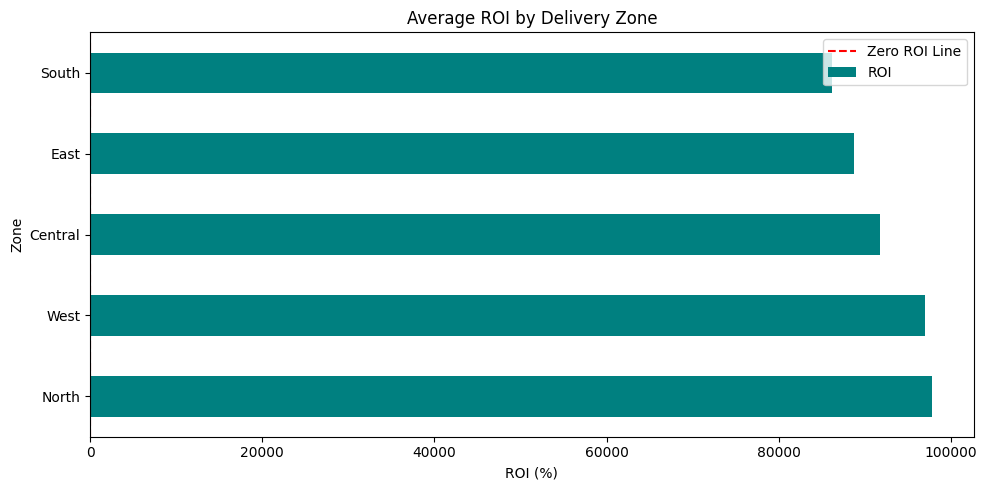


Average Total Cost, Revenue, and ROI by Delivery Zone (Sorted by ROI):
               Total_Cost       Revenue           ROI
Delivery_Zone                                        
North           20.362145  14340.131579  97776.276950
West            21.194306  14899.221790  96969.411225
Central         20.722656  14154.765625  91724.926618
East            21.217343  13866.503497  88710.066486
South           20.601866  13644.080780  86146.269097

Insights from Average ROI by Delivery Zone:
- Zones with Positive ROI: North, West, Central, East, South. These zones are, on average, generating a positive return on investment.
  The highest ROI is in 'North' with 97776.28%.
- All zones show a positive average ROI in this dataset.

General Observations:
- The horizontal red dashed line at 0 ROI helps quickly identify which zones are profitable (bars to the right) and which are not (bars to the left).
- There's a clear differentiation in profitability across zones.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Total_Cost'] = df['Fuel_Cost'] + df['Partner_Payout']

df['Revenue'] = df['discountedSellingPrice']

# Calculate ROI as (Revenue - Total_Cost) / Total_Cost * 100
# Handle potential division by zero if Total_Cost is 0
df['ROI'] = ((df['Revenue'] - df['Total_Cost']) / df['Total_Cost']) * 100
df.loc[df['Total_Cost'] == 0, 'ROI'] 

# Group by Delivery_Zone and calculate the mean of Total_Cost, Revenue, and ROI
zone_roi = df.groupby('Delivery_Zone')[['Total_Cost', 'Revenue', 'ROI']].mean().sort_values('ROI', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
zone_roi[['ROI']].plot(kind='barh', color='teal', figsize=(10, 5), ax=plt.gca()) # Use ax=plt.gca() to plot on the current figure
plt.title("Average ROI by Delivery Zone")
plt.xlabel("ROI (%)")
plt.ylabel("Zone")
plt.axvline(0, color='red', linestyle='--', label='Zero ROI Line')
plt.legend()
plt.tight_layout()
plt.show()

# Display the calculated zone_roi DataFrame
print("\nAverage Total Cost, Revenue, and ROI by Delivery Zone (Sorted by ROI):")
print(zone_roi)

# Provide insights based on the calculated ROI
print("\nInsights from Average ROI by Delivery Zone:")

# Identify zones with positive ROI
positive_roi_zones = zone_roi[zone_roi['ROI'] > 0]
if not positive_roi_zones.empty:
    print(f"- Zones with Positive ROI: {', '.join(positive_roi_zones.index.tolist())}. These zones are, on average, generating a positive return on investment.")
    print(f"  The highest ROI is in '{positive_roi_zones['ROI'].idxmax()}' with {positive_roi_zones['ROI'].max():.2f}%.")
else:
    print("- No zones show a positive average ROI in this dataset.")

# Identify zones with negative ROI
negative_roi_zones = zone_roi[zone_roi['ROI'] <= 0]
if not negative_roi_zones.empty:
    print(f"- **Zones with Negative or Zero ROI:** {', '.join(negative_roi_zones.index.tolist())}. These zones are, on average, losing money or breaking even.")
    print(f"  The lowest ROI is in '{negative_roi_zones['ROI'].idxmin()}' with {negative_roi_zones['ROI'].min():.2f}%.")
else:
    print("- All zones show a positive average ROI in this dataset.")

# General observations
print("\nGeneral Observations:")
print("- The horizontal red dashed line at 0 ROI helps quickly identify which zones are profitable (bars to the right) and which are not (bars to the left).")
print("- There's a clear differentiation in profitability across zones.")

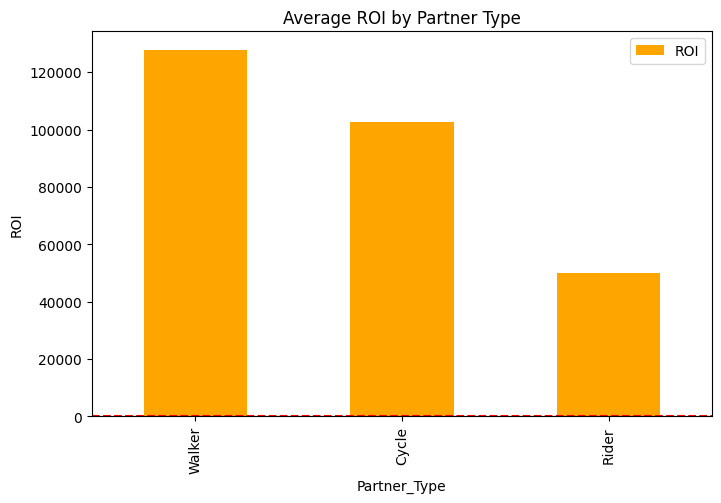


Average Total Cost, Revenue, and ROI by Partner Type (Sorted by ROI):
              Total_Cost       Revenue            ROI
Partner_Type                                         
Walker         12.599346  14362.714636  127777.776868
Cycle          16.110793  14063.606010  102746.410345
Rider          32.787071  14152.448513   49913.370119

Insights from Average ROI by Partner Type:
- **Partner Types with Positive ROI:** Walker, Cycle, Rider. These partner types are, on average, generating a positive return on investment.
  The highest ROI is with 'Walker' partners, at 127777.78%.
- All partner types show a positive average ROI in this dataset.


In [8]:
partner_roi = df.groupby('Partner_Type')[['Total_Cost', 'Revenue', 'ROI']].mean().sort_values('ROI', ascending=False)

partner_roi[['ROI']].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Average ROI by Partner Type")
plt.ylabel("ROI")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Display the calculated partner_roi DataFrame
print("\nAverage Total Cost, Revenue, and ROI by Partner Type (Sorted by ROI):")
print(partner_roi)

# Provide insights based on the calculated ROI
print("\nInsights from Average ROI by Partner Type:")

# Identify partner types with positive ROI
positive_roi_partners = partner_roi[partner_roi['ROI'] > 0]
if not positive_roi_partners.empty:
    print(f"- Partner Types with Positive ROI: {', '.join(positive_roi_partners.index.tolist())}. These partner types are, on average, generating a positive return on investment.")
    print(f"  The highest ROI is with '{positive_roi_partners['ROI'].idxmax()}' partners, at {positive_roi_partners['ROI'].max():.2f}%.")
else:
    print("- No partner types show a positive average ROI in this dataset.")

# Identify partner types with negative or zero ROI
negative_roi_partners = partner_roi[partner_roi['ROI'] <= 0]
if not negative_roi_partners.empty:
    print(f"- **Partner Types with Negative or Zero ROI:** {', '.join(negative_roi_partners.index.tolist())}. These partner types are, on average, losing money or breaking even.")
    print(f"  The lowest ROI is with '{negative_roi_partners['ROI'].idxmin()}' partners, at {negative_roi_partners['ROI'].min():.2f}%.")
else:
    print("- All partner types show a positive average ROI in this dataset.")



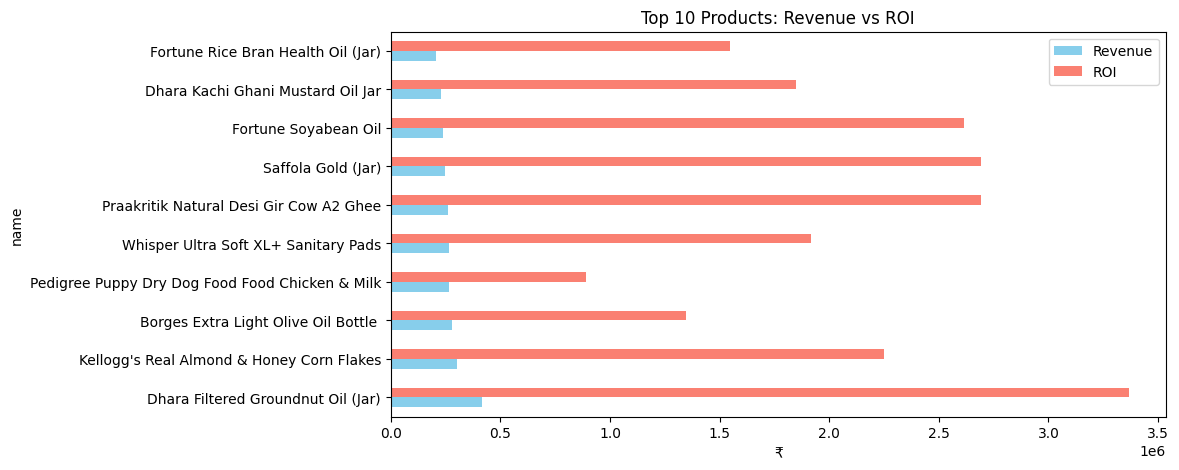


Top 10 Products by Revenue (Total Revenue and Sum of ROI):
                                                 Revenue           ROI
name                                                                  
Dhara Filtered Groundnut Oil (Jar)                417000  3.366801e+06
Kellogg's Real Almond & Honey Corn Flakes         300600  2.249662e+06
Borges Extra Light Olive Oil Bottle               279800  1.346515e+06
Pedigree Puppy Dry Dog Food Food Chicken & Milk   264000  8.914943e+05
Whisper Ultra Soft XL+ Sanitary Pads              263400  1.917020e+06
Praakritik Natural Desi Gir Cow A2 Ghee           261000  2.691194e+06
Saffola Gold (Jar)                                248000  2.692130e+06
Fortune Soyabean Oil                              236000  2.615153e+06
Dhara Kachi Ghani Mustard Oil Jar                 228600  1.848454e+06
Fortune Rice Bran Health Oil (Jar)                207800  1.549524e+06
When analyzing 'Top 10 Products: Revenue vs ROI', the core idea is to understand if high

In [13]:
product_roi = df.groupby('name')[['Revenue', 'ROI']].sum().sort_values('Revenue', ascending=False).head(10)

product_roi.plot(kind='barh', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.title('Top 10 Products: Revenue vs ROI')
plt.xlabel('₹')
plt.show()


# Display the product_roi DataFrame
print("\nTop 10 Products by Revenue (Total Revenue and Sum of ROI):")
print(product_roi)

print("When analyzing 'Top 10 Products: Revenue vs ROI', the core idea is to understand if high revenue products also translate to high profitability (ROI), or if there are discrepancies.")



if not product_roi.empty:
    # Get the product with highest revenue
    top_revenue_product = product_roi.index[0]
    top_revenue_value = product_roi['Revenue'].iloc[0]
    top_revenue_roi = product_roi['ROI'].iloc[0]

    # Get the product with highest ROI among the top 10 revenue products
    highest_roi_product_in_top10 = product_roi['ROI'].idxmax()
    highest_roi_value_in_top10 = product_roi['ROI'].max()

    print(f"- Top Revenue Generators:The product '{top_revenue_product}' is the highest revenue generator, bringing in ₹{top_revenue_value:.2f}.")

    print(f"-ROI of Top Revenue Products:")
    # Iterate through the top products to compare revenue and ROI
    for index, row in product_roi.iterrows():
        print(f"  - '{index}': Total Revenue ₹{row['Revenue']:.2f}, Summed ROI {row['ROI']:.2f}%")

    print(f"-Discrepancies/Key Observations:")
    
    if top_revenue_product == highest_roi_product_in_top10:
        print(f"  - The highest revenue product ('{top_revenue_product}') is also the product with the highest summed ROI among the top 10 revenue products, indicating a strong performance in both sales volume and profitability per sale.")
    else:
        print(f"  - While '{top_revenue_product}' is the top revenue generator, '{highest_roi_product_in_top10}' has the highest summed ROI ({highest_roi_value_in_top10:.2f}%) among these top 10 products. This suggests '{highest_roi_product_in_top10}' might be more profitable per unit or transaction, despite generating less overall revenue within this top 10 group.")



    

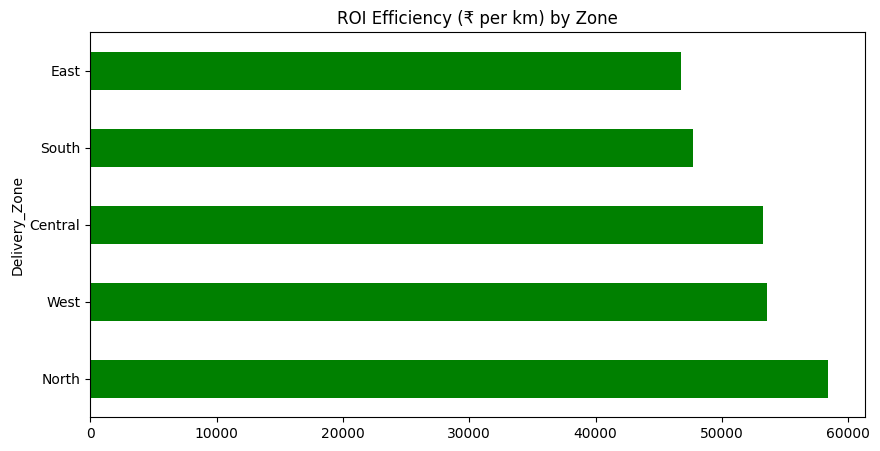


Average ROI Efficiency (ROI per km) by Delivery Zone (Sorted):
Delivery_Zone
North      58420.822254
West       53539.710846
Central    53236.189999
South      47682.649145
East       46725.329810
Name: ROI_per_km, dtype: float64

Insights from Average ROI Efficiency (ROI per km) by Zone:
- Most ROI Efficient Zone: The 'North' zone is the most efficient in terms of ROI per kilometer, generating an average of 58420.82% ROI for every kilometer delivered.
- Least ROI Efficient Zone: The 'East' zone is the least efficient, with an average ROI of 46725.33% per kilometer.


In [15]:
df['ROI_per_km'] = df['ROI'] / df['Distance_km'].replace(0, 1)  # Avoid divide-by-zero

roi_efficiency = df.groupby('Delivery_Zone')['ROI_per_km'].mean().sort_values(ascending=False)
roi_efficiency.plot(kind='barh', figsize=(10, 5), color='green')
plt.title("ROI Efficiency (₹ per km) by Zone")
plt.show()

# Display the calculated roi_efficiency DataFrame
print("\nAverage ROI Efficiency (ROI per km) by Delivery Zone (Sorted):")
print(roi_efficiency)

# Provide insights based on the calculated ROI efficiency
print("\nInsights from Average ROI Efficiency (ROI per km) by Zone:")

# Identify the zone with the highest ROI per km
highest_roi_per_km_zone = roi_efficiency.index[0]
highest_roi_per_km_value = roi_efficiency.iloc[0]
print(f"- Most ROI Efficient Zone: The '{highest_roi_per_km_zone}' zone is the most efficient in terms of ROI per kilometer, generating an average of {highest_roi_per_km_value:.2f}% ROI for every kilometer delivered.")

# Identify the zone with the lowest ROI per km
lowest_roi_per_km_zone = roi_efficiency.index[-1]
lowest_roi_per_km_value = roi_efficiency.iloc[-1]
print(f"- Least ROI Efficient Zone: The '{lowest_roi_per_km_zone}' zone is the least efficient, with an average ROI of {lowest_roi_per_km_value:.2f}% per kilometer.")


In [ ]:
# Cost Optimization & ROI Analysis
This notebook explores how Zepto can optimize its last-mile delivery costs and maximize ROI. We analyze cost components, revenue per order, and ROI efficiency across delivery zones, partners, and products.

## Key Questions Answered
- Which delivery zones are the most profitable?
- Which partner types yield higher returns?
- Are some products more revenue-generating but cost-inefficient?
- Which zones deliver the highest ROI per km?


In [17]:
import pandas as pd
import os
df = pd.read_csv('zepto_logistics_dataset.csv')



output_path = 'zone_roi_summary.csv' 

try:
    df.to_csv(output_path, index=False)
    print(f"✅ Cleaned data successfully saved as '{output_path}'")
except OSError as e:
    print(f"❌ Error saving cleaned data: {e}")
    print("This is likely a permission issue preventing file writing. Please ensure your environment allows saving files to the current directory.")
    print("\nHere are the first 5 rows of the cleaned DataFrame:")
    print(df.head())

✅ Cleaned data successfully saved as 'zone_roi_summary.csv'
